<a href="https://colab.research.google.com/github/wgcv/TensorFlow-Taller-2.0/blob/master/Workshop_TF_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Por Gustavo Cevallos
# www.wgcv.me
# Link de este notebook bit.ly/tfgye

# Machine Learning


![Caja Negra Modelo](https://drive.google.com/uc?id=1LEGNJi7FqEht52VtPFur8pBmbw_Uudp3)


Es entrenar un modelo usando ejemplos y el modelo encuentra sus propias reglas, para luego poder predecir valores que no fueron entrenados.



En el desarrollo de software tradicional el algoritmo es conocido, creamos una función que genera la salida esperada. En Machine Learning los valores de entrada y salidas son conocidos, pero el algortimo que genera nuestra salida no lo conocemos, entonces en Machine learning el algoritmo debe aprender como generar nuestra salida.



## Ejemplo

Veamos el siguiente ejemplo

![Entrada Salida](https://drive.google.com/uc?id=1Z_qB-hyjGe_C9xooh11ic_08dJhR41G3)


### Solución


![Funcion](https://drive.google.com/uc?id=1TTJWHL_9soRhSbr6NfTz5ti2yoy6aavN)


## Redes neuronales

Una red neuronal consiste de capas de una o más neuronas. Cada unidad de neurona está formada por varias entradas de diferentes pesos, estas entrada son sumadas (Una combinación lineal) y luego pasan por una función de activación y esta salida puede ser la entrada de otra neurona o la salida de la red.

![Entrada Salida](https://drive.google.com/uc?id=1QCGvH7GGhY6TEMDM_a7Q9HaW7GcBkiEy)


Matemáticamente se ve de la siguiente forma:

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

También lo podemos representar como un vector:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Deep learning
Cuando nuestra red neuronal tiene más de 2 capas (La Capa de entrada y Capa de salida ), las capas intermedias se llaman capas ocultas (Hidden Layers). Como observamos la neurona tiene dos partes una que es una función lineal y otra es la función de activación que normalmente se usa una función no lineal (Sigmoid, tanh, Softmax, ReLU) y gracias a la función de activación nuestro modelo puede aprender funciones no lineales.

![Entrada Salida](https://drive.google.com/uc?id=1vpCsjfe-wMU7uv_Xu1ERrz-FHlbZKqxG)



## Backpropagation
Es la propagación para atrás, una vez que nuestro modelo realiza las funciones matemáticas hasta la salida y se aplica una función de pérdida de error (Error loss) se calcula el gradiente para tunear cada uno de los pesos (Weights). El gradiente cual consiste en aplicar derivadas parciales y la regla de la cadena a cada uno de los pasos hasta llegar a la primera capa y optimizar los pesos de dicha capa. Como la primera derivada optimizamos la función de error lo que realizamos es restar dicha deriva y multiplicarla por un learning rate (El valor es  mayor a  0 y menor a 1), para que el aprendizaje sea  paulatino entre cada iteración.

![Backpropagtion](https://drive.google.com/uc?id=1y60w8QdkBmdoGA9p6wNF_vMyooX1TrGx)



# Framework

![TensorFlow](https://drive.google.com/uc?id=1p2zAV-Xso1I07NFB-HGIW0V4_xVeM2tG)

TensorFlow es una biblioteca de código abierto para machie learning, desarollado por Google y liberado en noviembre del 2015. Las ventajas de usar un framework al momento de desarrollar un proyecto de ML son muchas, entre las más importantes son:
- No tener que implementar desde cero los conceptos báiscos.
- Poder iterar de una forma más rápido con diferentes modelos e hiperparámetros.
- No tener que definir la estructura de la Red neuronal y sus derivadas (Dataflow Graph).
- Soporte para GPU.
- Soporte de paralelismo y ejecución distribuida

## Keras
![TensorFlow](https://drive.google.com/uc?id=1eYnLxVbvMRo1724tBbUuvtPWVLMTBhWQ)


# Nuestro primer modelo

En este workshop vamos a crear un modelo que pueda predecir valor que no esten en nuestro dataset de entrenamiento y revisar los primeros pasos para usar TensorFlow y Keras.

## Importar las dependencias
Lo primero que vamos hacer es importar las librerías básicas, la librería de Tensorflow como `tf` y [NumPy](http://www.numpy.org/) como `np`. Numpy es una librería que nos ayuda a manejar nuestros datos con alto desempeño.

In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np

Además vamos a importar logging y configurar solo mostrar errores

In [25]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Nuestro Dataset
Los modelos de Machine Learning supervisado se basan en crear el algoritmo a partir de nuestros datos de entradas y datos de salidas. Para nuestro dataset vamos a crear dos dataframes, uno de entradas que lo llamaremos `X` y otro de nuestras salidas `Y`, para entrenar nuestro modelo.



In [26]:
X = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
y = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
for i,c in enumerate(X):
  print("%s => %s" %(X[i], y[i]) )

-40.0 => -40.0
-10.0 => 14.0
0.0 => 32.0
8.0 => 46.0
15.0 => 59.0
22.0 => 72.0
38.0 => 100.0


### Terminología en Mahchine Learning

 - **Características** (Feature) — Puede ser uno o más valores que serán la entrada a nuestro modelo, para este ejemplo nuestra característica es solo una y esta representada por la variable `X`.
 - **Etiquetas** (Labels) — Es la salida de la predicción, que para nosotros es `Y`.

 - **Ejemplo** (Example) — Es una dupla de las característica y etiquetas. Por ejemplo `(-10, 14)`


## Nuestro modelo de redes neuronales
Vamos a crear nuestro modelo, el cual será el más sencillo una sola capa con una neurona.

## Creamos nuestra capa
Vamos a crear nuestro modelo, el cual será el más sencillo una sola capa con una neurona. Creamos la variable `c0` instanciandola de `tf.keras.layers.Dense` con la siguiente configuración:
- `input_shape=[1]` — Especificamos el valor de entrada de la capa, para nosotros es 1 solo valor. Si vemos la forma de nuestras características tiene un único valor de entrada por cada ejemplo.

- `units=[1]` — Definimos la canitdad de neuronas en dicha capa,  como nuestro modelo solo tiene una capa tambien estaríamos definiendo la salida.

In [27]:
c0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Construimos el modelo con las capas definidas
Una vez definda las capas de nuestro modelo debemos definir nuestro modelo que pueden ser varias capas, para esto usaremos `tf.keras.Sequential` que recibe una lista ordenada de capas .

In [28]:
modelo = tf.keras.Sequential([c0])

## Compilamos nuestro modelo con la función de perdida y Optimizador
Antes de poder utilizar nuestro modelo debemos definir que función de perdida vamos a usar y como vamos a optimizar nuestro modelo.

- **Función de perdida** (Loss function) — Es la forma que que tal distante estamos de la prediccióan a nuestro resultado, la diferencia de esta medida la llamamos pérdida (loss).

- **Función de optimización** (Optimizer function) — La forma que logramos ajustar los pesos para que la pérdida seá menor.


In [29]:
modelo.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Estas dos funciones serán usadas al momento de ajustar(Fit) nuestro modelo, en el cual ingresan los ejemplso y se calcula la función de perdida y luego se optimiza los valores para obtener la pérdida mínima y se actualizan los pesos para cada uno de los ejemplos. Para este modelo usamos la función `mean_squared_error` conocida como Error cuadrático medio y el otpimizador Adam que es una versión del Gradiente descendiente Estocástico.

Al momento de pasar nuestro optimizador debemos tener en cuenta el valor de ratio de aprendizaje (Learning Rate) el cual será un hiperparámetro importante que podemos tunearlo. Si tenemos un Learning Rate muy pequeño va a demorar mucho entrenar nuestro modelo, mientras que un Learning Rate muy grande no vamos a llegar nunca al mínimo de toda la función. Para este modelo vamos a usar el LR de 0.1, pero el valor defecto es 0.001



## A entrenar nuestro modelo
Vamos a pasar nuestros ejemplos a nuestro modelo e ir aprendiendo gracias a la función de perdida y al optimizado. La primera vez que nuestro modelo corra va a iniciar con pesos (weights) aleatoreos, pero por cada vez que pasemos por nuestro modelo vamos a actualizar nuestros pesos. Las veces que pasamos nuestros ejemplos se llama epocas (epoch).

Para entrenar nuestro modelo usamos el método `.fit` y pasamos nuestras características y nuestras salidas, definimos cuantas iteraciones queremos y el parámetro `verbose` es para que nos de el detalle del entrenamiento u *ocultarlo*.

In [30]:
historia = modelo.fit(X, y, epochs=500, verbose=False)
print("Terminamos de entrenar el modelo")

Terminamos de entrenar el modelo


## Veamos los resultados
El método `.fit` regresa un objeto `history` que guarda la historia del modelo durante cada época(Epoch). Entre más grande sea el valor promedio de péridada significa que más lejos estaba nuestro modelo de predecir de forma correcta.

Vamos a visualizar con [Matplotlib](https://matplotlib.org/)
Vamos a pasar nuestros ejemplos a nuestro modelo e ir aprendiendo gracias a la función de perdida y al optimizado.

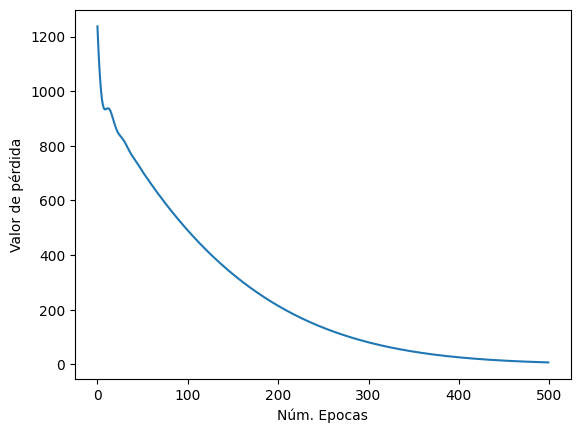

In [31]:
import matplotlib.pyplot as plt
plt.xlabel('Núm. Epocas')
plt.ylabel("Valor de pérdida")
plt.plot(historia.history['loss'])

## A predecir valores
Ahora que tenemos el modelo y se encuentra entrenado, podemos predecir valores desconocidos.
Veamos cuanto es el valor si nuestra entrada es 120.

In [32]:
print(modelo.predict(np.array([120.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[247.74504]]


El resultado esperado es 248, pero nuestro modelo nos predijo con una diferencia de ±0.3 de error

In [33]:
print(modelo.predict(np.array([-10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[11.101397]]


## ¿Que modelo creamos?
Veamos nuestros valores de entradas y salidas, también podemos calcular lineal con la formula $y = mx + b$.

*¿Qué función lineal que conocemos representa nuestro modelo?*

Si necesitamos otra pista podemos ver las variables de nuestras capas con `.get_weights()`


In [39]:
print("Pesos (Weights): {}\nSesgo (Bias): {}".format(c0.get_weights()[0][0], c0.get_weights()[1]))


Pesos (Weights): [1.8203357]
Sesgo (Bias): [29.304754]


# Resumen
- Aprendimos los conceptos básicos de las redes neuronales
- Creamos una red de una capa totalmente conectada (Fully connected o dense layer)
- Entrenamos nuestra red con 3500 ejemplos (7 pares por 500 veces)

## Juega con el modelo
Ahora te toca a tí modificar el modelo, puedes: crear más capas, cambia las épocas (Epochs) y tambien aumentar o reducir la canitdad de ejemplos.